In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def survival(AB, doseGy):
    return np.exp(-doseGy - (1/AB)*np.square(doseGy))

# Test, returns 1.0
#AB = 3.0
#doseGy = 0
#survival(AB, doseGy)

In [9]:
# Define tussue parameters
normal = {'AB':3, 'mu':0.46, 'label':'norm_SF' }
tumour = {'AB':10, 'mu':1, 'label':'tumour_SF'}  # chose middle of ranges

In [10]:
# Define model parameters
model = {'Presctiption' : 40.0, 'fractions': 15, 'dose_per_fraction': 40.0/15.0}
print(model)

{'Presctiption': 40.0, 'dose_per_fraction': 2.6666666666666665, 'fractions': 15}


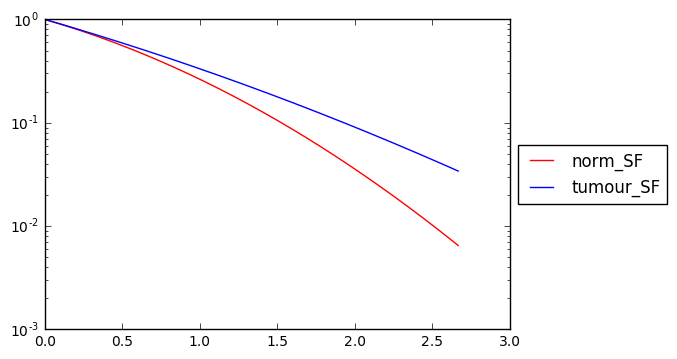

In [11]:
dose_scale = np.linspace(0, model['dose_per_fraction'], 200)

plt.plot(dose_scale, survival(normal['AB'], dose_scale), color='r', label=normal['label'])  #doseGy,
plt.plot(dose_scale, survival(tumour['AB'], dose_scale), color='b', label=tumour['label'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

# Model cell survival

In [12]:
def decay_calc(dose_input, fractions, recovery_factor):  
    BED = []  # dont start from empty list as cant append an empty list
    start = 1.0

    for i in list(range(fractions)):
        BED.extend(list(map((lambda x: start*x), dose_input)))
        start = BED[-1]*recovery_factor
    return np.asarray(BED)

Final control ratio 1552.00420947


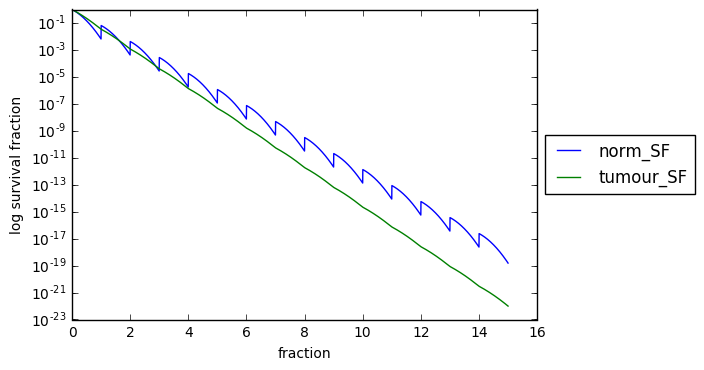

In [44]:
norm_recovery = 10  # factor for recovery of normal tissue, tumour default = 1, i.e. no recovery

normal_tissue = decay_calc(survival(normal['AB'], dose_scale).tolist(), model['fractions'], norm_recovery)
tumour_tissue = decay_calc(survival(tumour['AB'], dose_scale).tolist(), model['fractions'], 1)
#print('Final normal SF %s' % str(normal_tissue[-1]))
#print('Final tumour SF %s' % str(tumour_tissue[-1]))
print('Final control ratio %s' % str(normal_tissue[-1]/tumour_tissue[-1]))

time_scale = np.linspace(0, model['fractions'], len(normal_tissue))

plt.plot(time_scale, normal_tissue,  label=normal['label'])
plt.plot(time_scale, tumour_tissue, label=tumour['label'])
plt.yscale('log')
plt.ylabel('log survival fraction')
plt.xlabel('fraction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

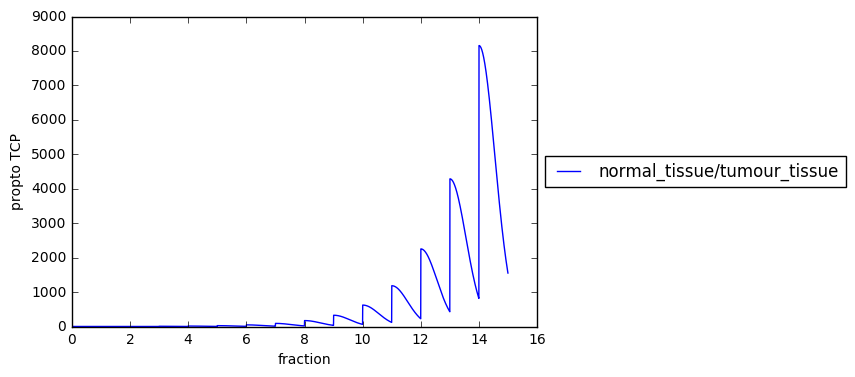

In [28]:
plt.plot(time_scale, normal_tissue/tumour_tissue, color='b', label='normal_tissue/tumour_tissue')
#plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('propto TCP')
plt.xlabel('fraction')

# Dose rate effects

From C. Deehan notes on radiobiol. Demonstrates that normal tissues more effected by dose rate

In [29]:
def BED_DR(N, R, T, mu, AB):   # N = fractions, R = dose rate, T = treatment time per fraction, mu = time const, AB = alpha beta ratio
    return N*R*T*(1 + (2*R/(mu*AB))*(1 - (1/(mu*T)*(1-(np.exp(-1*mu*T))))))

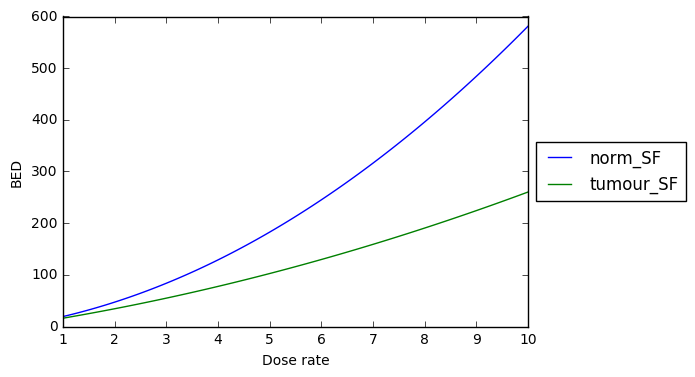

In [30]:
dose_rate = np.linspace(1.0,10.0,100)
time_fraction = 1.0
normal_BED = BED_DR(model['fractions'], dose_rate, time_fraction, normal['mu'], normal['AB'])
tumour_BED = BED_DR(model['fractions'], dose_rate, time_fraction, tumour['mu'], tumour['AB'])

plt.plot(dose_rate, normal_BED, label=normal['label']) #
plt.plot(dose_rate, tumour_BED, label=tumour['label'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('BED')
plt.xlabel('Dose rate')